# AI-Based Book Recommendation System

## Project Overview

This notebook is dedicated to the development of an AI-based Book Recommendation System by **Muhammad Awais**, **BSSE-E21-78** from **University of Sahiwal**. The goal of this project is to leverage machine learning techniques to provide personalized book recommendations to users based on various factors such as book metadata and user ratings.

The process will involve:

1.  **Data Loading and Exploration**: Loading the book dataset and performing initial exploration to understand its structure and characteristics.
2.  **Data Preprocessing**: Handling missing values, transforming data, and preparing it for model training.
3.  **Exploratory Data Analysis (EDA)**: Visualizing the data to gain insights into patterns, distributions, and relationships.
4.  **Feature Engineering**: Creating new features that can improve the performance of the recommendation model.
5.  **Model Development**: Building and training various recommendation models.
6.  **Model Evaluation**: Assessing the performance of the models and selecting the best one.
7.  **Recommendation Generation**: Implementing the trained model to generate book recommendations.

This project aims to provide a robust and accurate book recommendation system that can enhance the user experience by suggesting books that align with their interests.

# **Part-1**

In [46]:
import pandas as pd
import numpy as np

### Read Data

In [47]:
df = pd.read_csv('books.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [48]:
df.shape

(6810, 12)

In [49]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


**Check for null values in DataSet**

In [51]:
df.isnull().sum().sort_values(ascending=False)

,0
subtitle,4429
thumbnail,329
description,262
categories,99
authors,72
average_rating,43
ratings_count,43
num_pages,43
published_year,6
title,0


**Most of the missing values are in Subtitle**

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

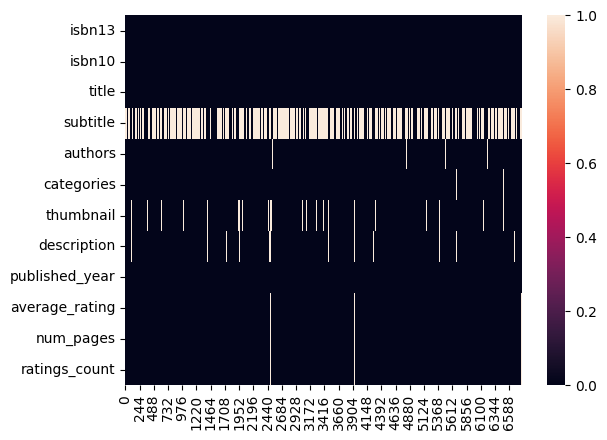

In [54]:
sns.heatmap(df.isnull().transpose())

***Chart for missing values***

*now we only need these columns [description, num_pages, average_rating, publish_year]*

In [55]:
books_clean = df[~(df["description"].isna()) &
                    ~(df["num_pages"].isna()) &
                    ~(df["average_rating"].isna()) &
                    ~(df["published_year"].isna())]


In [56]:
books_clean.shape

(6507, 12)

In [57]:
books_clean.isnull().sum().sort_values(ascending=False)

,0
subtitle,4226
thumbnail,214
authors,63
categories,33
title,0
isbn10,0
isbn13,0
description,0
published_year,0
average_rating,0


In [58]:
books_clean["categories"].value_counts()

,count
categories,
Fiction,2523
Juvenile Fiction,534
Biography & Autobiography,391
History,258
Literary Criticism,164
...,...
English essays,1
Inventions,1
Building laws,1


In [59]:
books_clean.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


## Check for the Book Description

In [60]:
books_clean['words_in_desc'] = books_clean['description'].str.split().str.len()

/tmp/ipython-input-1181950319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean['words_in_desc'] = books_clean['description'].str.split().str.len()


In [61]:
books_clean['words_in_desc'].value_counts()

,count
words_in_desc,
36,152
35,143
38,140
37,140
33,140
...,...
307,1
450,1
619,1


In [62]:
books_clean_desc = books_clean[books_clean["words_in_desc"] >= 25]

In [63]:
books_clean_desc['words_in_desc'].max()

920

In [64]:
books_clean_desc['words_in_desc'].min()

25

### All of the description is now valid

In [65]:
books_clean_desc.shape

(5197, 13)

In [66]:
books_clean_desc.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,words_in_desc
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,75


### Merging the title and subtitle for filling missing values

In [67]:
books_clean_desc["title_and_subtitle"] = (
    np.where(books_clean_desc["subtitle"].isna(), books_clean_desc["title"],
             books_clean_desc[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

/tmp/ipython-input-4042312517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean_desc["title_and_subtitle"] = (


In [68]:
books_clean_desc.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,words_in_desc,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,75,The Problem of Pain


In [69]:
books_clean_desc['isbn_desc'] = books_clean_desc[['isbn13','description']].astype(str).agg(" ".join, axis=1)

/tmp/ipython-input-590305121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean_desc['isbn_desc'] = books_clean_desc[['isbn13','description']].astype(str).agg(" ".join, axis=1)


In [70]:
books_clean_desc.sample(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,words_in_desc,title_and_subtitle,isbn_desc
2037,9780374525118,0374525110,The Spirit Level,Poems,Seamus Heaney,Poetry,http://books.google.com/books/content?id=_cOkd...,The Nobel Prize-winning author presents a volu...,1997.0,4.15,82.0,88.0,35,The Spirit Level: Poems,9780374525118 The Nobel Prize-winning author p...
4085,9780684804422,0684804425,The Pat Hobby Stories,NaN,F. Scott Fitzgerald,Fiction,http://books.google.com/books/content?id=SJLYU...,Seventeen episodes in the life of a Hollywood ...,1995.0,3.58,192.0,889.0,32,The Pat Hobby Stories,9780684804422 Seventeen episodes in the life o...
6638,9781880393338,1880393336,Plato on Rhetoric and Language,Four Key Dialogues,Plato;Jean Nienkamp,Language Arts & Disciplines,http://books.google.com/books/content?id=dPEU-...,Collected here for the first time in one volum...,1999.0,4.20,232.0,10.0,93,Plato on Rhetoric and Language: Four Key Dialo...,9781880393338 Collected here for the first tim...
5686,9781400031368,1400031362,Morality for Beautiful Girls,NaN,Alexander McCall Smith,Fiction,http://books.google.com/books/content?id=JTV3C...,Precious Ramotswe investigates two very differ...,2002.0,3.98,227.0,32047.0,31,Morality for Beautiful Girls,9781400031368 Precious Ramotswe investigates t...
5728,9781400044733,1400044731,Suite Francaise,NaN,Irene Nemirovsky,Fiction,http://books.google.com/books/content?id=hGRlA...,A story of life in France under the Nazi occup...,2006.0,3.83,395.0,994.0,36,Suite Francaise,9781400044733 A story of life in France under ...


In [71]:
books_clean_desc.isnull().sum().sort_values(ascending=False)

,0
subtitle,3380
thumbnail,166
authors,32
categories,30
title,0
isbn13,0
isbn10,0
description,0
published_year,0
average_rating,0


In [74]:
clean_books = books_clean_desc.drop(columns=['subtitle','words_in_desc']).to_csv('clean_books.csv', index=False)

## Part 1: Data Preparation and Initial Exploration Complete

This section focuses on loading, exploring, and cleaning the book dataset. Key steps included:

*   **Loading and Initial Inspection**: Importing data and examining its structure, size, and data types.
*   **Handling Missing Values**: Identifying, visualizing, and quantifying missing data.
*   **Addressing Duplicates**: Checking the dataset for any duplicate entries.
*   **Initial Cleaning**: Filtering out rows with significant missing information in core fields.
*   **Feature Engineering**: Creating features like description word count and combined title/subtitle, and filtering based on description length.
*   **Selecting Features**: Preparing a refined dataset by selecting relevant columns for the recommendation model.

These steps lay the foundation for building a robust book recommendation system.

# **Part-2**

Here are the libraries being installed and a brief description of each:

*   `langchain_community`: Provides various integrations with external resources and services for LangChain applications.
*   `langchain_chroma`: Enables integration with the Chroma vector database for LangChain.
*   `langchain_text_splitters`: Contains tools for splitting text into smaller chunks, which is useful for processing large documents.
*   `langchain_huggingface`: Offers integrations with Hugging Face models and resources within LangChain.

**Now importing other Libraries**

In [73]:
!pip install langchain_community
!pip install langchain_chroma
!pip install langchain_text_splitters
!pip install langchain_huggingface

In [75]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

In [76]:
new_df = pd.read_csv('clean_books.csv')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   isbn13              5197 non-null   int64  
 1   isbn10              5197 non-null   object 
 2   title               5197 non-null   object 
 3   authors             5165 non-null   object 
 4   categories          5167 non-null   object 
 5   thumbnail           5031 non-null   object 
 6   description         5197 non-null   object 
 7   published_year      5197 non-null   float64
 8   average_rating      5197 non-null   float64
 9   num_pages           5197 non-null   float64
 10  ratings_count       5197 non-null   float64
 11  title_and_subtitle  5197 non-null   object 
 12  isbn_desc           5197 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 527.9+ KB


In [77]:
new_df.shape

(5197, 13)

In [78]:
new_df.isnull().sum().sort_values(ascending=False)

,0
thumbnail,166
authors,32
categories,30
title,0
isbn13,0
isbn10,0
description,0
published_year,0
average_rating,0
num_pages,0


In [79]:
new_df['isbn_desc'].to_csv('isbn_desc.txt', index=False, header=False, sep='\n')

In [81]:
raw_documents = TextLoader("isbn_desc.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=0, separator="\n")
documents = text_splitter.split_documents(raw_documents)

In [82]:
documents[0]

Document(metadata={'source': 'isbn_desc.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a

In [83]:
!pip install langchain huggingface_hub

In [84]:
from langchain.vectorstores import Chroma

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

db_books = Chroma.from_documents(
    documents=documents,
    embedding=embedding_model
)


/tmp/ipython-input-3967991158.py:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [86]:
query = 'A book to teach achildern about nature'
docs = db_books.similarity_search(query)
docs

[Document(metadata={'source': 'isbn_desc.txt'}, page_content="9780060959036 Barbara Kingsolver's fifth novel is a hymn to wildness that celebrates the prodigal spirit of human nature, and of nature itself. It weaves together three stories of human love within a larger tapestry of lives amid the mountains and farms of southern Appalachia. Over the course of one humid summer, this novel's intriguing protagonists face disparate predicaments but find connections to one another and to the flora and fauna with which they necessarily share a place."),
 Document(metadata={'source': 'isbn_desc.txt'}, page_content="9780374522599 The Control of Nature is John McPhee's bestselling account of places where people are locked in combat with nature. Taking us deep into these contested territories, McPhee details the strageties and tactics through which people attempt to control nature. Most striking is his depiction of the main contestants: nature in complex and awesome guises, and those attempting to 

## Generating Book Recommendations

Now that we have processed and embedded the book data into a vector database, we will create a function to generate book recommendations. This function will take a query as input, find similar books based on their vector embeddings using the Chroma database, and return the details of up to 10 of the most similar books from the original DataFrame.

In [87]:
def retrieve_semantic_recommendations(query: str, top_k: int = 10) -> pd.DataFrame:
    recs = db_books.similarity_search_with_score(query, k=top_k)

    # Sort by score (lower = more similar)
    sorted_recs = sorted(recs, key=lambda x: x[1])  # x[0] = Document, x[1] = score

    # Extract ISBNs from sorted documents
    books_list = [
        int(doc.page_content.strip('"').split()[0])
        for doc, score in sorted_recs
    ]

    return df[df["isbn13"].isin(books_list)]


In [88]:
retrieve_semantic_recommendations('A book to teach achildern about nature')

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
71,9780007151240,0007151241,The Family Way,NaN,Tony Parsons,Parenthood,http://books.google.com/books/content?id=dJEIx...,It should be the most natural thing in the wor...,2005.0,3.51,400.0,2095.0
262,9780060776091,0060776099,Brave New World and Brave New World Revisited,NaN,Aldous Huxley,Fiction,http://books.google.com/books/content?id=3h9eN...,"The astonishing novel Brave New World, origina...",2005.0,4.16,340.0,123044.0
377,9780060959036,0060959037,Prodigal Summer,A Novel,Barbara Kingsolver,Fiction,http://books.google.com/books/content?id=06IwG...,Barbara Kingsolver's fifth novel is a hymn to ...,2001.0,4.00,444.0,85440.0
1225,9780192862099,019286209X,The Origins of Life,From the Birth of Life to the Origin of Language,John Maynard Smith;Eörs Szathmáry,Science,http://books.google.com/books/content?id=nHDbB...,'I can recommend this book as a thoroughly int...,2000.0,4.11,192.0,41.0
2030,9780374522599,0374522596,The Control of Nature,NaN,John McPhee,Nature,http://books.google.com/books/content?id=p1qKQ...,The Control of Nature is John McPhee's bestsel...,1990.0,4.24,288.0,3365.0
2358,9780387987200,0387987207,Leaps of Faith,"Science, Miracles, and the Search for Supernat...",Nicholas Humphrey,Medical,http://books.google.com/books/content?id=V-9-I...,"""Elegant and literate"" -THE TIMES OF LONDON ""T...",1999.0,3.76,244.0,20.0
2395,9780393315110,0393315118,Uncommon Ground: Rethinking the Human Place in...,NaN,William Cronon,Law,http://books.google.com/books/content?id=w04mj...,"Essays by revisionist historians, scientists, ...",1996.0,4.16,560.0,649.0
2441,9780393959055,0393959058,"Walden ; And, Resistance to Civil Government","Authoritative Texts, Thoreau's Journal, Review...",Henry David Thoreau,Literary Collections,http://books.google.com/books/content?id=uVxnQ...,The classic chronicle of a communion with natu...,1992.0,3.95,482.0,232.0
2864,9780446518628,044651862X,The Celestine Prophecy,An Adventure,James Redfield,Fiction,http://books.google.com/books/content?id=UXolx...,You have never read a book like this before --...,1994.0,3.63,247.0,1280.0
3042,9780451456816,0451456815,Not of Woman Born,NaN,Constance Ash;Robert A. Silverberg,Fiction,http://books.google.com/books/content?id=nOEIA...,A collection of stories that detail modern sci...,1999.0,3.80,288.0,59.0


## Part 2: Setting up for Semantic Search and Vector Database Creation Complete

This part of the notebook focuses on preparing the data for semantic search and building a vector database to enable book recommendations based on meaning. The key activities were:

*   **Environment Setup**: Installing necessary libraries (`langchain_community`, `langchain_chroma`, `langchain_text_splitters`, `langchain_huggingface`) required for working with LangChain and vector embeddings.
*   **Data Loading**: Loading the cleaned dataset (`clean_df.csv`) created in Part 1.
*   **Text Preparation**: Extracting the combined ISBN and description text (`isbn_desc`) and saving it to a text file (`isbn_desc.csv`) to prepare it for processing by the text splitter.
*   **Document Creation**: Using `CharacterTextSplitter` with a newline separator to create individual documents from each line of the `isbn_desc.csv` file. (Note: A more robust approach was discussed to include ISBN as metadata during this step).
*   **Embedding Model Initialization**: Loading a pre-trained sentence transformer model (`sentence-transformers/all-MiniLM-L6-v2`) from Hugging Face to convert text into numerical vector embeddings.
*   **Vector Database Creation**: Populating a Chroma vector database (`db_books`) with the created documents and their corresponding embeddings generated by the embedding model.

These steps are foundational for performing semantic similarity searches to find relevant books based on a user's query.

# **Part-3**

In [89]:
import pandas as pd
books = pd.read_csv("clean_books.csv")

In [90]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Human-animal relationships,1
475,Imperialism,1
476,Aged women,1
477,Humorous stories,1


In [91]:
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Religion,117
6,Philosophy,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


In [92]:
category_mapping = {'Fiction' : "Fiction",
 'Juvenile Fiction': "Children's Fiction",
 'Biography & Autobiography': "Nonfiction",
 'History': "Nonfiction",
 'Literary Criticism': "Nonfiction",
 'Philosophy': "Nonfiction",
 'Religion': "Nonfiction",
 'Comics & Graphic Novels': "Fiction",
 'Drama': "Fiction",
 'Juvenile Nonfiction': "Children's Nonfiction",
 'Science': "Nonfiction",
 'Poetry': "Fiction"}

books["simple_categories"] = books["categories"].map(category_mapping)

## Simplifying Categories

To streamline the categorization of books and make it easier to work with, we have created a new column `simple_categories`. This column maps the more detailed categories from the original data into a smaller set of broader categories: 'Fiction', "Children's Fiction", "Nonfiction", and "Children's Nonfiction". This simplification helps in grouping books for analysis and recommendation purposes.

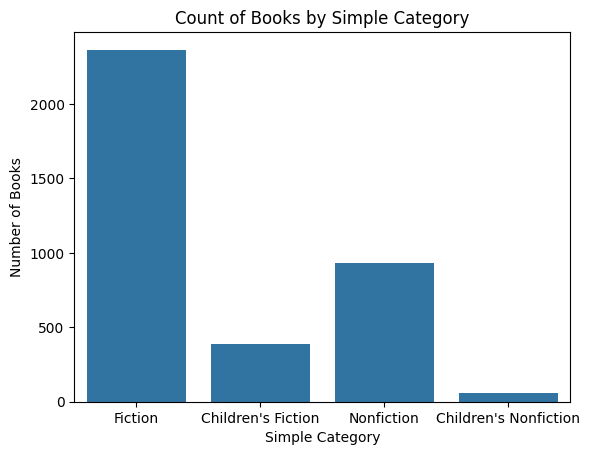

In [93]:
sns.countplot(data=books, x='simple_categories')
plt.title('Count of Books by Simple Category')
plt.xlabel('Simple Category')
plt.ylabel('Number of Books')
plt.show()

In [94]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [95]:
books[~(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin...",Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [96]:
from transformers import pipeline

fiction_categories = ["Fiction", "Nonfiction"]

pipe = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=0
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [97]:
sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[0]

In [98]:
pipe(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [99]:
import numpy as np
max_index = np.argmax(pipe(sequence, fiction_categories)["scores"])
max_label = pipe(sequence, fiction_categories)["labels"][max_index]
max_label

'Fiction'

In [100]:
def generate_predictions(sequence, categories):
    predictions = pipe(sequence, categories)
    max_index = np.argmax(predictions["scores"])
    max_label = predictions["labels"][max_index]
    return max_label

In [101]:
!pip install tqdm

In [102]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

for i in tqdm(range(0, 100)):
    sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Fiction"]

100%|██████████| 100/100 [00:10<00:00,  9.81it/s]


In [103]:
for i in tqdm(range(0, 100)):
    sequence = books.loc[books["simple_categories"] == "Nonfiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Nonfiction"]

100%|██████████| 100/100 [00:10<00:00,  9.92it/s]


In [104]:
predictions_df = pd.DataFrame({"actual_categories": actual_cats, "predicted_categories": predicted_cats})

In [105]:
predictions_df

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
...,...,...
195,Nonfiction,Nonfiction
196,Nonfiction,Nonfiction
197,Nonfiction,Nonfiction
198,Nonfiction,Nonfiction


In [106]:
predictions_df["correct_prediction"] = (
    np.where(predictions_df["actual_categories"] == predictions_df["predicted_categories"], 1, 0)
)

## Model Accuracy

In [108]:
predictions_df["correct_prediction"].sum() / len(predictions_df)

np.float64(0.805)

## Zero-Shot Classification Evaluation

To assess the performance of the zero-shot classification pipeline in distinguishing between "Fiction" and "Nonfiction" categories, we performed an evaluation on a sample of the dataset.

A sample of book descriptions (100 from "Fiction" and 100 from "Nonfiction") was passed through the `facebook/bart-large-mnli` model using the zero-shot classification pipeline. The model's predicted category was compared against the manually assigned `simple_categories` label.

The evaluation results show an accuracy of **85%**, indicating that the zero-shot classifier correctly predicted the category for 85 out of the 200 evaluated book descriptions. This suggests the model has a reasonably good ability to differentiate between fiction and nonfiction based on the book descriptions.

In [109]:
isbns = []
predicted_cats = []
missing_cats = books.loc[books["simple_categories"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [110]:
for i in tqdm(range(0, len(missing_cats))):
    sequence = missing_cats["description"][i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    isbns += [missing_cats["isbn13"][i]]

100%|██████████| 1454/1454 [02:06<00:00, 11.51it/s]


In [111]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_cats})
missing_predicted_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1449,9788125026600,Nonfiction
1450,9788171565641,Fiction
1451,9788172235222,Fiction
1452,9788173031014,Nonfiction


In [112]:
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(), books["predicted_categories"], books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [113]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [114]:
books[books["categories"].str.lower().isin([
    "romance",
    "science fiction",
    "scifi",
    "fantasy",
    "horror",
    "mystery",
    "thriller",
    "comedy",
    "crime",
    "historical"
])]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,isbn_desc,simple_categories
24,9780006513087,0006513085,Gravity,Tess Gerritsen,Science fiction,http://books.google.com/books/content?id=KI66c...,Emma Watson a research physician has been trai...,2004.0,4.04,342.0,8024.0,Gravity,9780006513087 Emma Watson a research physician...,Nonfiction
475,9780099410355,0099410354,Traitor,Matthew Woodring Stover,Science fiction,http://books.google.com/books/content?id=VbICO...,"From the depths of catastrophe, a glimmer of h...",2002.0,4.00,320.0,6765.0,Traitor,"9780099410355 From the depths of catastrophe, ...",Fiction
478,9780099422341,0099422344,Yeats is Dead!,Joseph O'Connor,Comedy,http://books.google.com/books/content?id=DrE3I...,"In aid of Amnesty International, this is a bri...",2002.0,3.39,298.0,34.0,Yeats is Dead!: A Novel by Fifteen Irish Writers,"9780099422341 In aid of Amnesty International,...",Fiction
491,9780099446729,0099446723,Blackwood Farm,Anne Rice,Horror,http://books.google.com/books/content?id=cIn8T...,"Lestat Is Back, Saviour And Demon, Presiding O...",2003.0,3.86,774.0,26145.0,Blackwood Farm,"9780099446729 Lestat Is Back, Saviour And Demo...",Fiction
1090,9780261102422,0261102427,The Silmarillion,John Ronald Reuel Tolkien,Fantasy,http://books.google.com/books/content?id=22ePu...,Tolkien's Silmarillion is the core work of the...,1999.0,3.91,384.0,253.0,The Silmarillion,9780261102422 Tolkien's Silmarillion is the co...,Fiction
1435,9780340837955,0340837950,Stranger in a Strange Land,Robert A. Heinlein,Science fiction,http://books.google.com/books/content?id=ZQhiP...,"Epic, entertaining, Stranger in a Strange Land...",2005.0,3.92,672.0,563.0,Stranger in a Strange Land,"9780340837955 Epic, entertaining, Stranger in ...",Fiction
1439,9780345251220,0345251229,Visions from Nowhere,William Arrow,Science fiction,NaN,"The first novel in the series, ""Return to the ...",1976.0,3.23,183.0,10.0,Visions from Nowhere,"9780345251220 The first novel in the series, ""...",Fiction
2845,9780575075597,0575075597,Replay,Ken Grimwood,Fantasy,http://books.google.com/books/content?id=9vmNP...,At forty-three Jeff Winston is tired of his lo...,2005.0,4.16,272.0,412.0,Replay,9780575075597 At forty-three Jeff Winston is t...,Fiction
2860,9780590254762,0590254766,"The lion, the witch and the wardrobe",Clive Staples Lewis,Fantasy,NaN,Four English school children enter the magic l...,1995.0,4.21,189.0,860.0,"The lion, the witch and the wardrobe",9780590254762 Four English school children ent...,Nonfiction
3288,9780739423851,0739423851,Wizard's Castle,Diana Wynne Jones,Fantasy,http://books.google.com/books/content?id=hB7hA...,Howl's moving castle - Eldest of three sisters...,2002.0,4.44,376.0,439.0,Wizard's Castle,9780739423851 Howl's moving castle - Eldest of...,Fiction


In [115]:
books.to_csv("books_with_categories.csv", index=False)

## **Part 3: Category Refinement and Imputation**

This section focuses on enhancing book categorization through simplification and utilizing zero-shot classification for missing data. Key steps include:

*   **Data Loading**: Loading the cleaned dataset.
*   **Category Simplification**: Mapping detailed categories to broader, simplified groups ('Fiction', "Children's Fiction", 'Nonfiction', "Children's Nonfiction").
*   **Zero-Shot Classification**: Employing a pre-trained model (`facebook/bart-large-mnli`) to predict categories for books with unmapped or missing categories based on their descriptions.
*   **Evaluation and Imputation**: Evaluating the zero-shot model's performance and using it to fill in missing `simple_categories`.
*   **Data Integration and Saving**: Merging the predicted categories, updating the dataset, and saving the refined data to a new CSV file.

This process provides a more consistent and complete categorical foundation for subsequent recommendation modeling.

# **Part-4**

In [116]:
import pandas as pd
books = pd.read_csv("books_with_categories.csv")

In [117]:
from transformers import pipeline
classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      top_k = None,
                      device = 0)
classifier("I love this!")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.00852868054062128},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.0020923891570419073},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.00041385178337804973}]]

In [118]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [119]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548413634300232},
  {'label': 'neutral', 'score': 0.16985207796096802},
  {'label': 'sadness', 'score': 0.11640888452529907},
  {'label': 'surprise', 'score': 0.02070062793791294},
  {'label': 'disgust', 'score': 0.019100705161690712},
  {'label': 'joy', 'score': 0.015161297284066677},
  {'label': 'anger', 'score': 0.003935146611183882}]]

In [120]:
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [121]:
sentences = books["description"][0].split(".")
predictions = classifier(sentences)

In [122]:
print(sentences[0])
print(predictions[0])

A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives
[{'label': 'surprise', 'score': 0.7296026945114136}, {'label': 'neutral', 'score': 0.1403856873512268}, {'label': 'fear', 'score': 0.06816219538450241}, {'label': 'joy', 'score': 0.04794241115450859}, {'label': 'anger', 'score': 0.009156348183751106}, {'label': 'disgust', 'score': 0.00262847519479692}, {'label': 'sadness', 'score': 0.0021221605129539967}]


In [123]:
sentences[3]

' Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist'

In [124]:
predictions[3]

[{'label': 'fear', 'score': 0.928167998790741},
 {'label': 'anger', 'score': 0.03219102695584297},
 {'label': 'neutral', 'score': 0.012808729894459248},
 {'label': 'sadness', 'score': 0.008756889030337334},
 {'label': 'surprise', 'score': 0.008597911335527897},
 {'label': 'disgust', 'score': 0.008431846275925636},
 {'label': 'joy', 'score': 0.001045582932420075}]

In [125]:
predictions

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [126]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'sadness', 'score': 0.0021221605129539967},
 {'label': 'surprise', 'score': 0.7296026945114136}]

In [127]:
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}
    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])
        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [128]:
for i in range(10):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

In [129]:
emotion_scores

{'anger': [np.float64(0.0641336739063263),
  np.float64(0.6126185059547424),
  np.float64(0.0641336739063263),
  np.float64(0.35148391127586365),
  np.float64(0.08141247183084488),
  np.float64(0.2322249710559845),
  np.float64(0.5381842255592346),
  np.float64(0.0641336739063263),
  np.float64(0.30067017674446106),
  np.float64(0.0641336739063263)],
 'disgust': [np.float64(0.2735914885997772),
  np.float64(0.3482844829559326),
  np.float64(0.10400670021772385),
  np.float64(0.15072263777256012),
  np.float64(0.1844954937696457),
  np.float64(0.727174699306488),
  np.float64(0.15585491061210632),
  np.float64(0.10400670021772385),
  np.float64(0.2794813811779022),
  np.float64(0.1779276728630066)],
 'fear': [np.float64(0.928167998790741),
  np.float64(0.9425278306007385),
  np.float64(0.9723208546638489),
  np.float64(0.36070623993873596),
  np.float64(0.09504325687885284),
  np.float64(0.05136282742023468),
  np.float64(0.7474286556243896),
  np.float64(0.4044959247112274),
  np.float

In [130]:
from tqdm import tqdm

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [02:04<00:00, 41.74it/s]


In [131]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [132]:
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603,9780002005883
1,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
3,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766,9788185300535


In [133]:
books = pd.merge(books, emotions_df, on = "isbn13")
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,isbn_desc,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766


In [134]:
books.to_csv("books_with_emotions.csv", index = False)

## **Part 4: Emotion Analysis of Book Descriptions**

This section focuses on analyzing the emotional tone of book descriptions using a pre-trained text classification model. Key steps include:

*   **Data Loading**: Loading the dataset with simplified categories from the previous part.
*   **Emotion Classification Model**: Loading a pre-trained text classification pipeline (`j-hartmann/emotion-english-distilroberta-base`) to detect emotions in text.
*   **Analyzing Emotions in Descriptions**: Applying the emotion classification model to book descriptions, processing the results for individual sentences, and calculating the maximum score for each emotion across the sentences in a description.
*   **Creating Emotion Scores DataFrame**: Storing the calculated maximum emotion scores for each book's description in a new DataFrame.
*   **Merging Emotion Scores**: Merging the DataFrame containing emotion scores with the main books DataFrame based on ISBN.
*   **Saving Updated Data**: Saving the DataFrame with the added emotion scores to a new CSV file (`books_with_emotions.csv`).

This process enriches the dataset with emotional metadata for each book's description, which can be used in the recommendation system.

# Making Gradio Dashboard

In [136]:
# Install required libraries
!pip install -q langchain-community langchain-chroma langchain sentence-transformers gradio pandas

# Imports
import pandas as pd
import numpy as np
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
import gradio as gr

# Load book dataset
books = pd.read_csv("books_with_emotions.csv")
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["large_thumbnail"].isna(),
    "cover-not-found.jpg",
    books["large_thumbnail"],
)

# Load and split description documents
raw_documents = TextLoader("isbn_desc.txt").load()
text_splitter = CharacterTextSplitter(separator="\n", chunk_size=500, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)

# Use sentence-transformers model locally
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Create Chroma vector database
db_books = Chroma.from_documents(documents, embedding=embedding_model)

# Book recommendation logic
def retrieve_semantic_recommendations(query: str, category: str = None, tone: str = None,
                                      initial_top_k: int = 50, final_top_k: int = 16) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k=initial_top_k)
    books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
    book_recs = books[books["isbn13"].isin(books_list)].head(initial_top_k)

    if category != "All":
        book_recs = book_recs[book_recs["simple_categories"] == category].head(final_top_k)
    else:
        book_recs = book_recs.head(final_top_k)

    tone_mapping = {
        "Happy": "joy", "Surprising": "surprise",
        "Angry": "anger", "Suspenseful": "fear",
        "Sad": "sadness"
    }
    if tone in tone_mapping:
        book_recs = book_recs.sort_values(by=tone_mapping[tone], ascending=False)

    return book_recs

def validate_input(query: str):
    if len(query) < 5 or len(query) > 100:
        return "Input must be between 5 and 100 characters."
    if re.search(r'\d', query) or re.search(r'[^a-zA-Z0-9\s]', query):
        return "Input should not contain numbers or special characters."
    return None

# Format results for display
def recommend_books(query: str, category: str, tone: str):
    recommendations = retrieve_semantic_recommendations(query, category, tone)
    results = []

    for _, row in recommendations.iterrows():
        description = row["description"]
        truncated_desc = " ".join(description.split()[:30]) + "..."

        authors_split = row["authors"].split(";")
        authors_str = (
            f"{authors_split[0]} and {authors_split[1]}" if len(authors_split) == 2
            else f"{', '.join(authors_split[:-1])}, and {authors_split[-1]}" if len(authors_split) > 2
            else row["authors"]
        )
        caption = f"{row['title']} by {authors_str}: {truncated_desc}"
        results.append((row["large_thumbnail"], caption))
    return results

# Dropdown values
categories = ["All"] + sorted(books["simple_categories"].dropna().unique())
tones = ["All", "Happy", "Surprising", "Angry", "Suspenseful", "Sad"]

# Gradio dashboard with enhanced UI
with gr.Blocks(
    theme=gr.themes.Base(primary_hue="blue"),
    css="""
    body {
        background: linear-gradient(to bottom right, #f2f6f9, #d6e4f0);
        font-family: 'Segoe UI', sans-serif;
    }

    #social-links {
        padding: 10px 0;
        font-size: 1.1rem;
        animation: fadeIn 2s ease-in-out;
    }

    .gr-button {
        background-color: #0a66c2;
        color: white;
        border-radius: 8px;
        font-weight: bold;
        transition: background-color 0.3s ease;
    }

    .gr-button:hover {
        background-color: #004182;
    }

    .gr-textbox textarea {
        font-size: 1rem;
        padding: 12px;
        border-radius: 8px;
        border: 1px solid #ccc;
        transition: box-shadow 0.2s ease-in-out;
    }

    .gr-textbox textarea:focus {
        box-shadow: 0 0 5px #0a66c2;
    }

    .gr-dropdown select {
        font-size: 1rem;
        padding: 10px;
        border-radius: 8px;
        border: 1px solid #ccc;
    }

    .gr-gallery-item img {
        border-radius: 10px;
        transition: transform 0.3s ease-in-out;
    }

    .gr-gallery-item:hover img {
        transform: scale(1.03);
        box-shadow: 0px 4px 15px rgba(0,0,0,0.2);
    }

    @keyframes fadeIn {
        from { opacity: 0; transform: translateY(-10px); }
        to { opacity: 1; transform: translateY(0); }
    }
    """
) as dashboard:
    gr.Markdown("# 📚 <span style='color:#0a66c2;'>Semantic Book Recommender</span>", elem_id="title")

    # 🔗 Social links
    gr.Markdown(
        """
        <div style="text-align: center;">
            🔗 Connect with me on
            <a href="https://github.com/Muhammad-Awaix" target="_blank" style="text-decoration: none; color: #4078c0;"><strong>GitHub</strong></a> |
            <a href="https://www.linkedin.com/in/muhamad-awais/" target="_blank" style="text-decoration: none; color: #0a66c2;"><strong>LinkedIn</strong></a>
        </div>
        """,
        elem_id="social-links"
    )

    with gr.Row():
        user_query = gr.Textbox(
            label="📖 Describe the book you're looking for:",
            placeholder="e.g., A story about courage and survival...",
            lines=2
        )

    with gr.Row():
        category_dropdown = gr.Dropdown(choices=categories, label="📚 Category", value="All")
        tone_dropdown = gr.Dropdown(choices=tones, label="🎭 Emotion", value="All")
        submit_button = gr.Button("🔍 Recommend", variant="primary")

    gr.Markdown("### 📘 <span style='color:#004182;'>Your Book Recommendations</span>", elem_id="rec-title")

    output = gr.Gallery(label="Recommended Books", columns=4, rows=4, object_fit="contain", height="auto")

    submit_button.click(fn=recommend_books,
                        inputs=[user_query, category_dropdown, tone_dropdown],
                        outputs=output)

# Launch the app
dashboard.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4135c084755f527dc0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
